## Regression and Parametric models 

Polynomial Regression Using Matlab 
 
→ Open Matlab and refer to the example presented in Fig.4.5 of the Alpaydin book.  To start, we will recreate this example. o Plot the function (f(x) = 2sin(1.5x)) in the range shown. o Create a “sample training set” of 20 points as indicated in the text.  That is, generate a random set of x-values, and corresponding outputs by adding Gaussian random noise (using randn()) to the function above.  Plot the data over your sine wave plot (use the “hold on” command). → Now we will fit some models to this data.  To implement linear and polynomial regression, Matlab has a curve fitting toolbox and curve fitting tool – to run it type “cftool”.  Refer to the Matlab help to learn how to use it. → Fit polynomials of increasing order to the data and observe the models fitting the data and the output in the results box on the cftool window.   
 
# Q1: Using the curve fitting tool to produce a plot of error as a function of 
model order up to 9, similar to that shown in Fig.4.7 of the Alpaydin book.  To do this you will need to create a second (validation) dataset (in addition to the training set above).  Some hints: o The cftool results show you the SSE (sum of squares error = N*MSE where N is the number of data points).  It also shows the trained model (polynomial with coefficients).  You can paste this model back into the Matlab command line (or a script or function) to calculate validation set error. o Alternatively, the polyfit() and polyval() functions may be of use. Read their help files to learn more. 
 
→ Observe the effect of overfitting as the model complexity increased while you trained the models.  To see this clearly, you might need to increase the variance of the additive noise to the function when generating the outputs of your training data (the book uses variance of 0.1). 
 
Boston Housing Dataset 
 In the practical materials, you will find a copy of the widely-used “Boston housing dataset”.  It is part of the UCI machine learning repository: 
 
https://archive.ics.uci.edu/ml/index.html

# Q1
Here we want to make a sinusoid: $f(x) = 2sin(1.5x)$ We will then use additive noise, N(0,1) to generate a distribution.

The distribution has an underlying deterministic element that we can fit a polynomial regrassion model to.

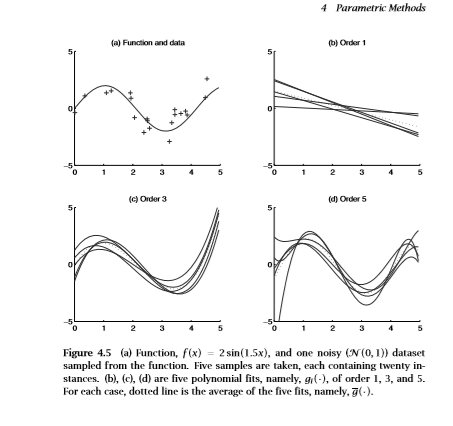

In [1]:
#Pandas provides us with some powerful objects like DataFrames and Series which are very useful for working with and analyzing data whereas numpy library which provides objects for multi-dimensional arrays, Pandas provides in-memory 2d table object called Dataframe.
import numpy as np 

In [3]:
# Quality of life function # def means define,def is short for "define". It's a keyword that you need to define a function (aka method). All the code that you put between the def function_name(parameters) and end will be executed every time you call the function_name later
def f(x):
    return 2*np.sin(1.5*x)

In [4]:
# Get x uniformly over the range presented in Alpaydin
x = np.linspace(0,5,100)
y = f(x)

In [5]:
import matplotlib.pyplot as plt

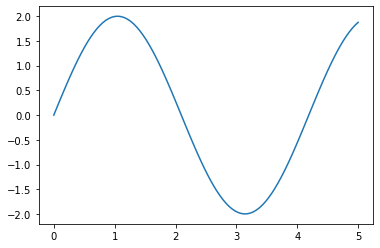

In [6]:
plt.plot(x,y)

Generate our training and validation set

In [7]:
# Sampling uniformly over the range gives stochasticity linspace doesn't have
x_train = np.random.uniform(0,5,size=20)
x_val = np.random.uniform(0,5,size=20)

In [8]:
noise_coeff = 1
y_train = f(x_train) + noise_coeff*np.random.normal(size=20)
y_val = f(x_val) + noise_coeff*np.random.normal(size=20)

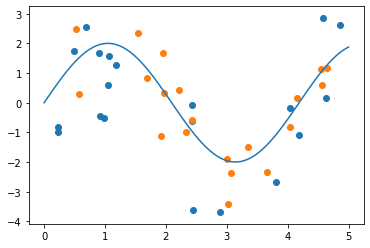

In [9]:
# Sanity check to make sure our test and train data mimic alpaydin
plt.plot(x,y)
plt.scatter(x_train,y_train)
plt.scatter(x_val, y_val)

(-5, 5)

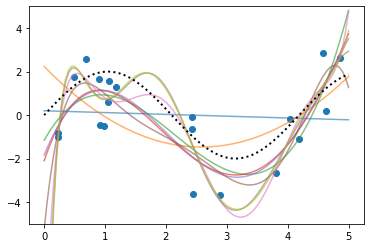

In [10]:
# Create polynomials order 1 to 9 
plt.scatter(x_train,y_train)
for i in range(1,10):
    z = np.polyfit(x_train,y_train,i)
    fun = np.poly1d(z)
    yf = fun(x)
    plt.plot(x,yf,alpha=0.6)
plt.plot(x,y,c='k',linestyle=':', linewidth=2)
plt.ylim([-5,5])

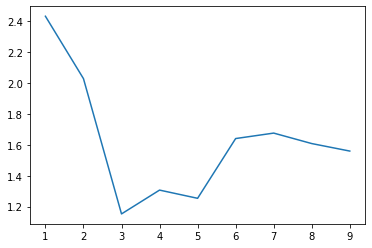

In [11]:
# Calculate the validation error
mse_list = []
for i in range(1,10):
    z = np.polyfit(x_train,y_train,i)
    fun = np.poly1d(z)
    y_pred = fun(x_val)
    y_err = y_val - y_pred
    y_err *= y_err
    mse = np.mean(y_err)
    mse_list.append(mse)
plt.plot(list(range(1,10)), mse_list)

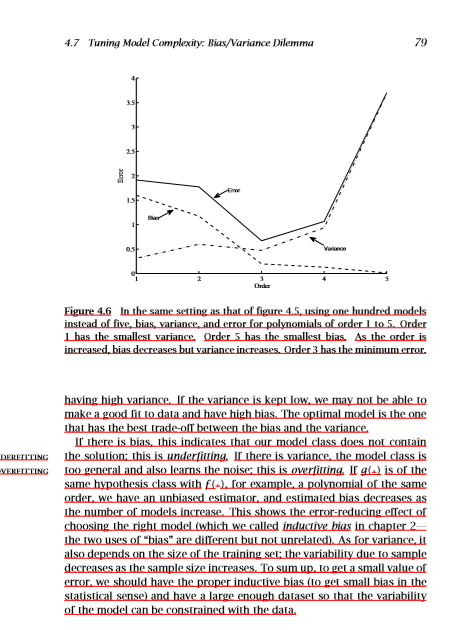
Elbow is where you would expect based on number of turning points in underlying function.

Q2 and Q3 are similar to Q1 so I'll leave them for you to do individually.

→ Q2: Using column 6 as your input variable and column 14 as your target variable, fit linear and polynomial models of varying degree to this data.  Produce a table of error values for models up to degree 5.  

→ Q3: Split the dataset into two halves.  Repeat Q2 using one half of the dataset for training and evaluate the error on the other half of the data.  Write a few sentences comparing any differences.  Can you offer some explanation of these differences (a paragraph or two)?  Relate this to key concepts of supervised learning from lectures. 
 

# Parametric Probabilistic Classification 


 Using Matlab, write a function or script that implements a simple parametric classifier to produce plots similar to Figs 4.2 and 4.3 of Alpaydin.  More specifically: → Your code should take as input data for a one-dimensional, two-class classification problem, assuming a real-valued input feature. → You should use Gaussian (normal) distributions as your model; i.e. fit a Gaussian to each class distribution using maximum likelihood estimates for the parameters of each Gaussian.  This produces a model for p(x|C1) and for p(x|C2). → Assume equal priors for the class distributions (P(C1) and P(C2)).  In this case, the posteriors are just p(C1|x) and p(C2|x) and are equal to the discriminants g(x) for each class. → To test your code, create a “reduced” version of the Iris dataset (see Prac 1 – a plain text version of this dataset can be found in the practical materials); firstly by discarding all the features from the data except the first one (sepal length), secondly by discarding all examples for the third class (Iris-virginica). → Using the Matlab hist() function, produce histograms to give you a picture of the data and something to compare you results with. 
 

 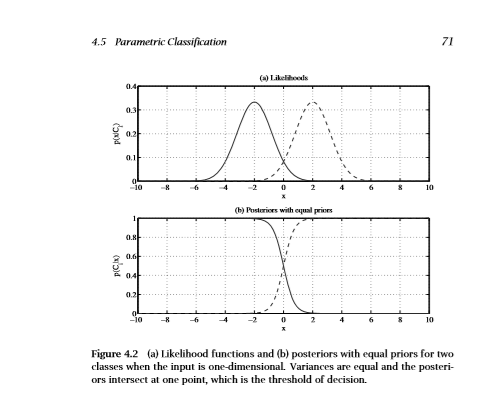
 
 

→ Q4: Use your code to produce plots of the likelihoods and class posteriors for the reduced Iris data. 

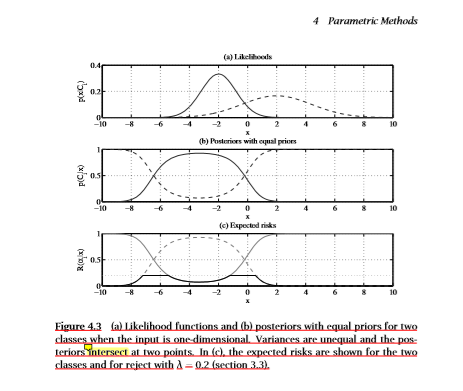

# Q4
In this question we need to split a dataset into a two class problem and then model each class as a Normal distribution which contains parameters $\mu$ and $\sigma$. The question then asks us to replicate figures 4.2 and 4.3 in Alpaydin.

To do this we split the classes in two and then calculate the parameters. We then generate and plot their respective pdfs which come from $\mathcal{N}(\mu_i,\sigma_i)$ (pdf eqution is in alpaydin/wiki).

We can then calculate the posterior by:

$P(C_i|x) = \frac{p(x|C_i)P(C_i)}{\sum_k(p(x|C_k)P(C_k))}$

We assume that $P(C_i) = 0.5$

In [16]:
class NormalPdf:
    def __init__(self,mu, std):
        self.mu = mu
        self.std = std
        
    def __call__(self,x):
        diff = (x - self.mu)*(x-self.mu)
        return 1/(np.sqrt(2*np.pi)*self.std) \
                * np.exp(-(diff/(2*self.std*self.std))) 

def generate_norm(data, labels, label):
    c = data[labels==label]
    mean = np.mean(c)
    std = np.std(c)
    return NormalPdf(mean, std)

def PPC(data, labels):
    uniques = np.unique(labels)
    assert len(uniques) == 2, 'labels are no good'
    norm1 = generate_norm(data, labels, uniques[0])
    norm2 = generate_norm(data, labels, uniques[1])
    x = np.linspace(np.min(data)-4, np.max(data)+4, 500)
    plt.plot(x, norm1(x))
    plt.plot(x, norm2(x))
    plt.xlabel('x')
    plt.ylabel(r'$p(x|C_i)$')
    #assume equal priors
    post1num = norm1(x)*0.5
    post2num = norm2(x)*0.5
    denom = post1num + post2num
    post1 = post1num/denom
    post2 = post2num/denom
    plt.figure()
    plt.plot(x, post1)
    plt.plot(x, post2)
    plt.xlabel('x')
    plt.ylabel(r'$P(C_i|x)$')
    plt.show()

In [17]:
import pandas

In [18]:
# pandas is a convenient way of reading files
df= pandas.read_csv('iris.txt', header=None)

In [19]:
# Get rid of the third vlass
df = df[df[4]!= 'Iris-virginica']

In [20]:
data = np.array(df[0])
labels = np.array(df[4])

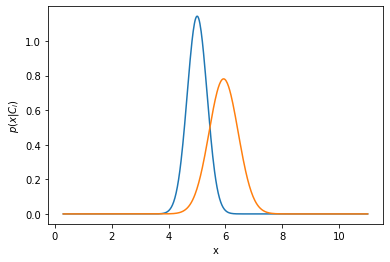

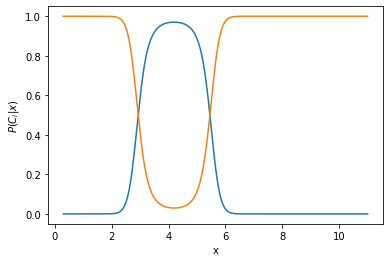

In [21]:
# generate the plots using our function
PPC(data,labels)